In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/who-is-resposible-for-global-warming/Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv
/kaggle/input/who-is-resposible-for-global-warming/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv


In [2]:
df=pd.read_csv('/kaggle/input/who-is-resposible-for-global-warming/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_10576797.csv')

In [3]:
df.describe()
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN


In [4]:
li=[]
i=1960
for i in range(1960,2015):
    li.append(df[str(i)].mean())
print(li)

[2.044178390793474, 2.157479864612687, 2.248804922234259, 2.763420508468537, 2.9126800680583638, 3.0316694687680505, 3.0446996531513206, 3.11118631039457, 3.3093329675861205, 3.9191244998744708, 4.197480374441901, 4.421934022171001, 4.488119374050182, 4.805842462757311, 4.499457508288618, 4.366105995064503, 4.356608858163115, 4.486631686322526, 4.5110171351857185, 4.563013751718171, 4.464373396895399, 3.9935487840470927, 3.8724678090734477, 3.7268202549780467, 3.824386691028607, 3.917695550952998, 3.905446716964806, 3.942603194258269, 4.077311975172728, 4.213261544573976, 4.082445945212627, 4.1212466636367875, 4.479572514120304, 4.502859007030892, 4.424655464717061, 4.474822216535954, 4.4940497638889045, 4.492356496479425, 4.482341602264683, 4.450072664303414, 4.578757215491835, 4.631754758142363, 4.598493646548026, 4.730172571204212, 4.777434844199243, 4.821384876018388, 4.899786316837871, 4.930891345825242, 4.936829229107444, 4.7228041108161545, 4.845600978891713, 4.806688992085348, 

In [5]:
lii=[str(i) for i in range(1960,2015)]
print(lii)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [6]:
data={'year':lii,'avg_co2emissions':li}

In [7]:
d = pd.DataFrame(data)
d

,year,avg_co2emissions
0,1960,2.044178
1,1961,2.157480
2,1962,2.248805
3,1963,2.763421
4,1964,2.912680
5,1965,3.031669
6,1966,3.044700
7,1967,3.111186
8,1968,3.309333
9,1969,3.919124


In [8]:
maximumavg=max(d['avg_co2emissions'])
print(maximumavg)
x=d.index[d['avg_co2emissions']==maximumavg]
print(d.iloc[x])

4.949244606997713
    year  avg_co2emissions
52  2012          4.949245


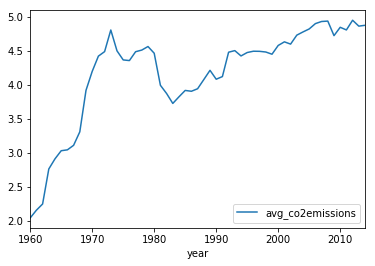

In [9]:
d.plot(x='year', y='avg_co2emissions')

In [10]:
import pandas as pd
City = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")
Country = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")
MajorCity = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv")
State = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv")
GlobalTemperatures = pd.read_csv("../input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

In [11]:
GlobalTemperatures.describe()
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
GlobalTemperatures=GlobalTemperatures.dropna(axis=0,how='any')

In [13]:
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


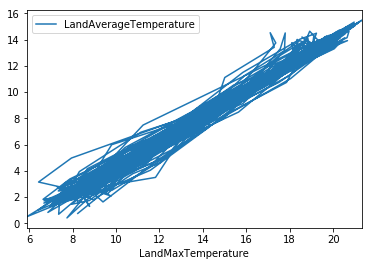

In [14]:
GlobalTemperatures.plot('LandMaxTemperature','LandAverageTemperature')

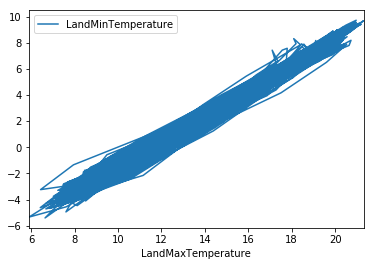

In [15]:
GlobalTemperatures.plot('LandMaxTemperature','LandMinTemperature')

In [16]:
India = City[City.Country == 'India']

In [17]:
India.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E


In [18]:
Hyderabad=India[City.City=='Hyderabad']
Hyderabad.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3083366,1796-01-01,22.759,2.322,Hyderabad,India,16.87N,78.70E
3083367,1796-02-01,25.094,1.453,Hyderabad,India,16.87N,78.70E
3083368,1796-03-01,27.725,2.443,Hyderabad,India,16.87N,78.70E
3083369,1796-04-01,31.280,1.789,Hyderabad,India,16.87N,78.70E
3083370,1796-05-01,32.701,1.406,Hyderabad,India,16.87N,78.70E
3083371,1796-06-01,29.856,3.788,Hyderabad,India,16.87N,78.70E
3083372,1796-07-01,26.749,2.606,Hyderabad,India,16.87N,78.70E
3083373,1796-08-01,26.433,3.415,Hyderabad,India,16.87N,78.70E
3083374,1796-09-01,26.793,3.762,Hyderabad,India,16.87N,78.70E
3083375,1796-10-01,25.396,1.655,Hyderabad,India,16.87N,78.70E


In [19]:
Hyderabad=Hyderabad.dropna(axis=0,how='any')

In [20]:
Hyderabad.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [21]:
Hyderabad.shape

(2508, 7)

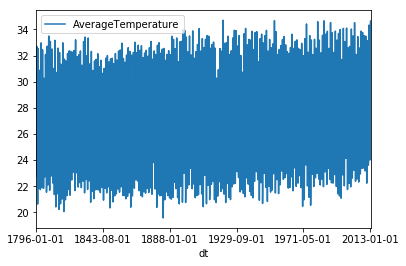

In [22]:
Hyderabad.plot(x='dt',y='AverageTemperature')

In [23]:
Hyderabad['year']=pd.DatetimeIndex(Hyderabad['dt']).year

In [24]:
Hyderabad.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
3083366,1796-01-01,22.759,2.322,Hyderabad,India,16.87N,78.70E,1796
3083367,1796-02-01,25.094,1.453,Hyderabad,India,16.87N,78.70E,1796
3083368,1796-03-01,27.725,2.443,Hyderabad,India,16.87N,78.70E,1796
3083369,1796-04-01,31.280,1.789,Hyderabad,India,16.87N,78.70E,1796
3083370,1796-05-01,32.701,1.406,Hyderabad,India,16.87N,78.70E,1796


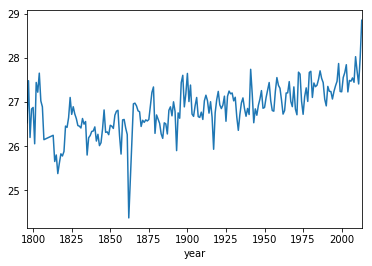

In [25]:
Hyderabad.groupby('year')['AverageTemperature'].mean().plot(x='year',y='AverageTemperature')

In [26]:
X=Hyderabad['year'].values.reshape(-1,1)
y=Hyderabad['AverageTemperature'].values.reshape(-1,1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[16.49284938]
[[0.00543024]]


In [30]:
y_pred = regressor.predict(X_test)

In [31]:
h=pd.DataFrame([2014,2015,2016,2017,2018,2019,2020,2021,2022]).values.reshape(-1,1)

In [32]:
h_pred=regressor.predict(h)
h_pred

array([[27.42935773],
       [27.43478797],
       [27.44021821],
       [27.44564846],
       [27.4510787 ],
       [27.45650894],
       [27.46193918],
       [27.46736943],
       [27.47279967]])

In [33]:
pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred

,Actual,Predicted
0,30.670,26.533368
1,23.183,26.826601
2,20.752,26.794019
3,32.469,27.114404
4,27.796,26.457344
...,...,...
497,32.494,26.717996
498,24.650,27.152415
499,31.540,26.946066
500,22.876,26.707135


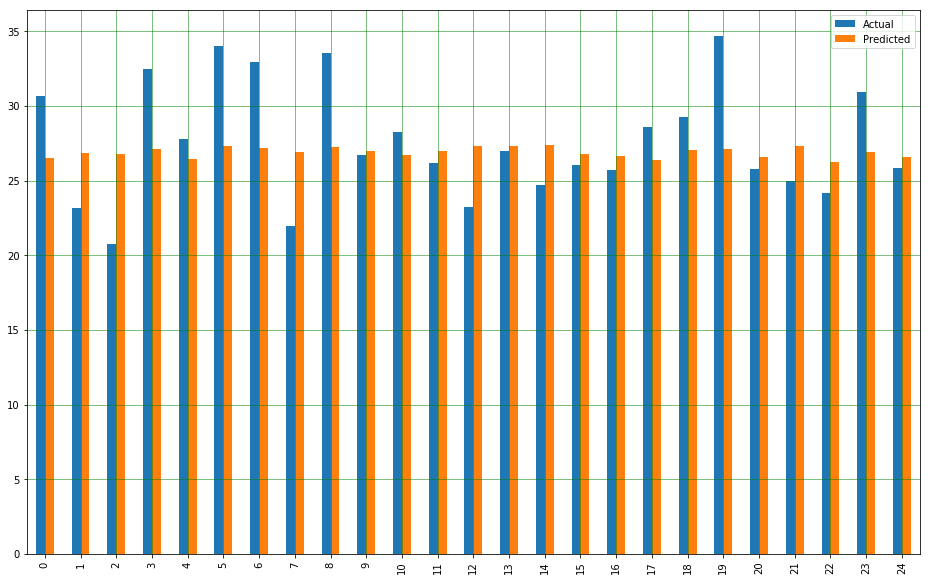

In [34]:
pred1 = pred.head(25)
pred1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

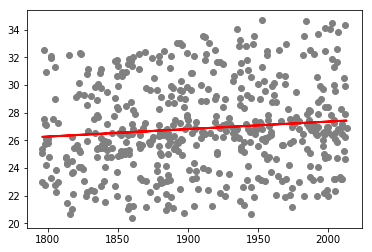

In [35]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.5790880638552087
Mean Squared Error: 10.43482854989891
Root Mean Squared Error: 3.230298523340979


In [37]:
cities=['Hyderabad','New Delhi','Bombay','Pune','Kochi','Srinagar']
city_temp = India[India.City.isin(cities)]

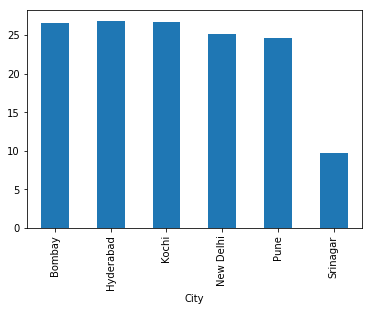

In [38]:
city_temp.groupby('City')['AverageTemperature'].mean().plot(kind='bar')